Summary:
Loop over each combination of attackers and defenders.
Simulate dice rolls for both attackers and defenders.
Compare the rolls between attackers and defenders.
Count the losses for both attackers and defenders.
Store the loss percentages for later plotting in bar charts.
This is done for all the combinations of attackers and defenders in the options list, and the results are then plotted to visualize the losses in the Risk battle simulation.

Attack(n_attackers=1, n_defenders=1)
Attacker losses: 577, Defender losses: 423

Attack(n_attackers=1, n_defenders=2)
Attacker losses: 719, Defender losses: 281

Attack(n_attackers=2, n_defenders=1)
Attacker losses: 417, Defender losses: 583

Attack(n_attackers=2, n_defenders=2)
Attacker losses: 1172, Defender losses: 828

Attack(n_attackers=3, n_defenders=1)
Attacker losses: 345, Defender losses: 655

Attack(n_attackers=3, n_defenders=2)
Attacker losses: 921, Defender losses: 1079



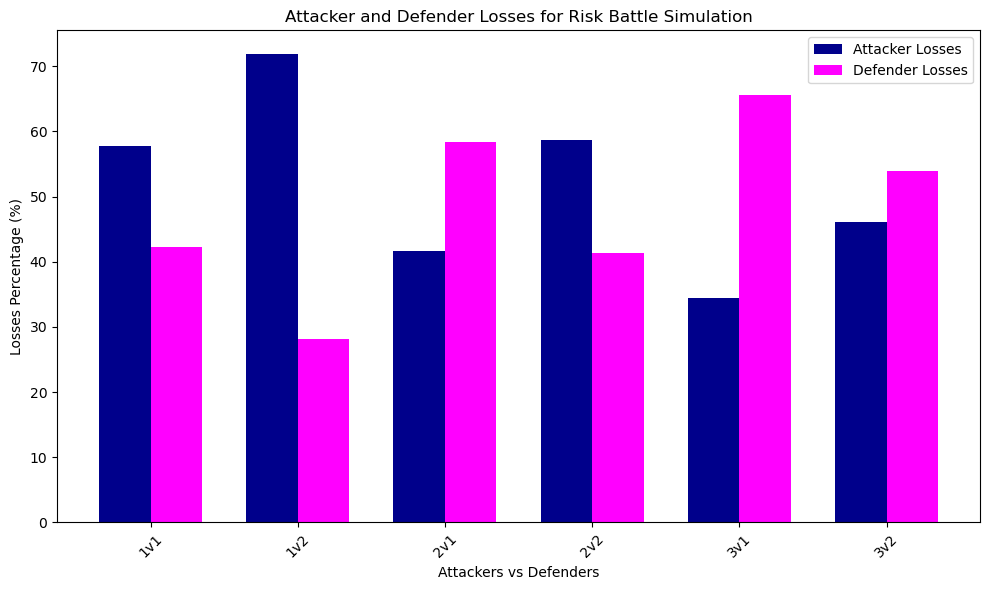

In [1]:
from typing import NamedTuple
import numpy as np
import matplotlib.pyplot as plt

n_repeats = 1000  # Number of times battle will be repeated for each combination of attackers and defenders

class Attack(NamedTuple): # NamedTuple to store the number of attackers and defenders
    n_attackers: int 
    n_defenders: int

# Define the different combinations of attackers and defenders
options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

# Initialize random number generator
rng = np.random.default_rng()

# Store results to plot later
attacker_losses = []
defender_losses = []

# Simulate battles for each combination of attackers and defenders
for option in options:
    print(option)

    # Generate attacker's and defender's dice rolls
    attack = rng.integers(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort(axis=1)
    attack = np.flip(attack, axis=1)  # Flip to descending order
    #print(attack)

    defence = rng.integers(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort(axis=1)
    defence = np.flip(defence, axis=1)  # Flip to descending order
    #print(defence)

    # Compare up to the minimum number of dice
    min_length = min(attack.shape[1], defence.shape[1])
    result = attack[:, :min_length] > defence[:, :min_length]

    # Calculate losses for both attacker and defender
    losses_attacker = np.sum(result == False)  # Attacker loses where result is False
    losses_defender = np.sum(result == True)   # Defender loses where result is True

    print(f"Attacker losses: {losses_attacker}, Defender losses: {losses_defender}\n")

    # Store the results for plotting
    attacker_losses.append(losses_attacker / (n_repeats * min_length) * 100)  # Convert to percentage
    defender_losses.append(losses_defender / (n_repeats * min_length) * 100)  # Convert to percentage

# Prepare the bar chart
labels = [f"{option.n_attackers}v{option.n_defenders}" for option in options]
x_pos = np.arange(len(labels))

# Plotting the bar chart with two bars for each simulation (attacker losses and defender losses)
bar_width = 0.35  # Width of the bars
plt.figure(figsize=(10, 6))

# Plotting the attacker and defender losses side by side
plt.bar(x_pos - bar_width / 2, attacker_losses, bar_width, label='Attacker Losses', color='darkblue')
plt.bar(x_pos + bar_width / 2, defender_losses, bar_width, label='Defender Losses', color='magenta')

# Adding labels and title
plt.xticks(x_pos, labels, rotation=45)
plt.xlabel('Attackers vs Defenders')
plt.ylabel('Losses Percentage (%)')
plt.title('Attacker and Defender Losses for Risk Battle Simulation')

# Show legend
plt.legend()

# Adjust layout and display the chart
plt.tight_layout()
plt.show()
